# Additive Model vs GFN2 Polarizability Comparison

-NOTE: 
- PubChemQC DFT calculations were run on GAUSSIAN with wb97X-D
- Hexamer DFT calculations were run on ORCA with wb97X (no dispersion)

### Imports

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

### Data Processing

In [17]:
master = pd.read_csv('additive_data.csv')
pcqc = master.loc[master['subset']=='pcqc']
hexamers = master.loc[master['subset']=='hexamers']

### Method Definition

In [18]:
'''
    Calculates root mean square error

    Parameters
    ---------
    predictions: ndarray of floats
        expected values [based on best fit line]
    observations: ndarray of floats
        observed values
    
    Returns
    -------
    rmse: float
        root mean square error
'''
def calc_rmse(predictions, observations):
    rmse = np.sqrt(((predictions - observations) ** 2).mean())
    return rmse

In [19]:
'''
    Performs linear regression on data set and calculates associated values

    Parameters
    ---------
    x: ndarray of floats
        x values
    y: ndarray of floats
        y values
    intercept: boolean
        if true, calculates y intercept, if false sets y intercept to 0 (forces fit)
    
    Returns
    -------
    lin_regress_var: list of floats
        slope, y-intercept, r^2, root mean square error
'''

def perform_lin_regress(x, y, intercept=True):  
     
    # 2D X array necessary for sklearn
    xi = x.reshape((-1,1))

    model = LinearRegression(fit_intercept = intercept)
    model.fit(xi,y)
    
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(xi,y)

    # calculate RMSE
    y_pred = y
    y_true = []
    for val in x: 
        y_tr = slope*val + intercept
        y_true.append(y_tr)
    y_true = np.array(y_true)

    rmse = calc_rmse(y_pred, y_true)
    
    lin_regress_var = [slope, intercept, r_squared, rmse]
    
    return lin_regress_var

In [20]:
# matplotlib global formatting

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

plt.rcParams['figure.dpi'] = 300

### Plots

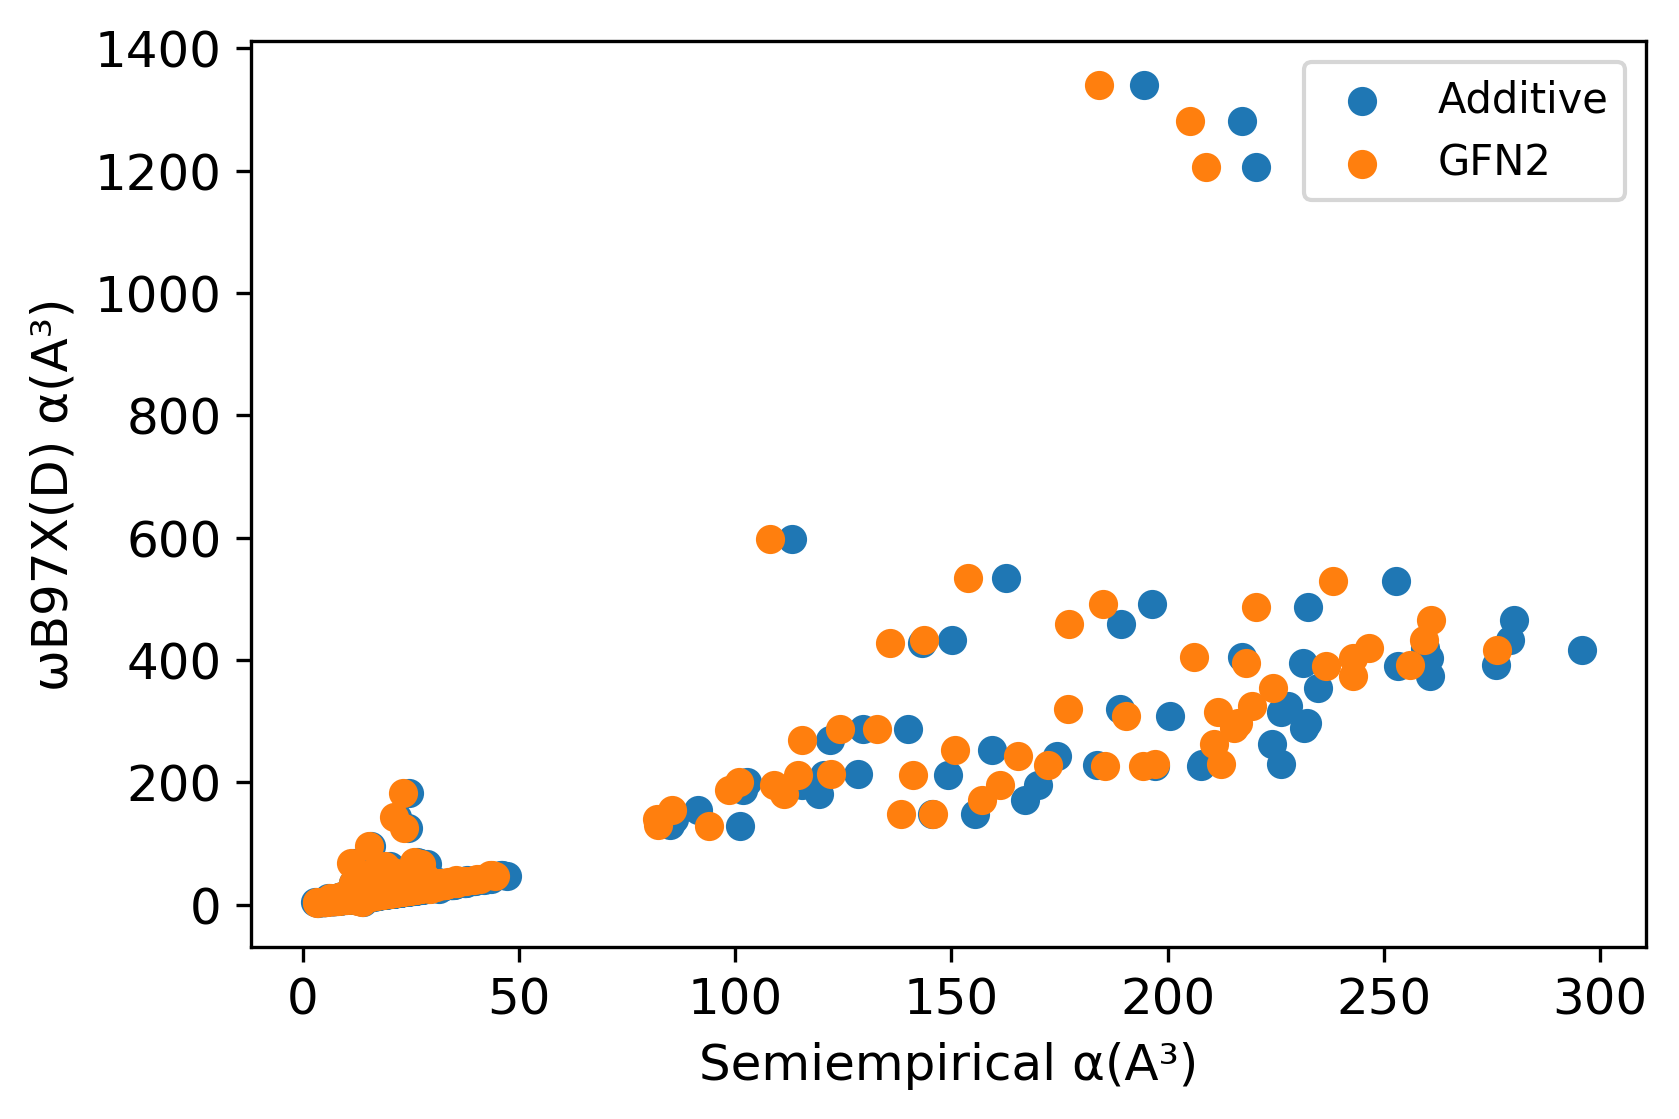

In [25]:
plt.scatter(x=master['add_alpha(A^3)'], y=master['dft_alpha(A^3)'])
plt.scatter(x=master['gfn2_alpha(A^3)'], y=master['dft_alpha(A^3)'])
plt.xlabel('Semiempirical α(A³)')
plt.ylabel('ωB97X(D) α(A³)')

plt.legend(['Additive', 'GFN2'])

# plt.savefig('additive_comparison.png', transparent=False, bbox_inches='tight')

plt.show()

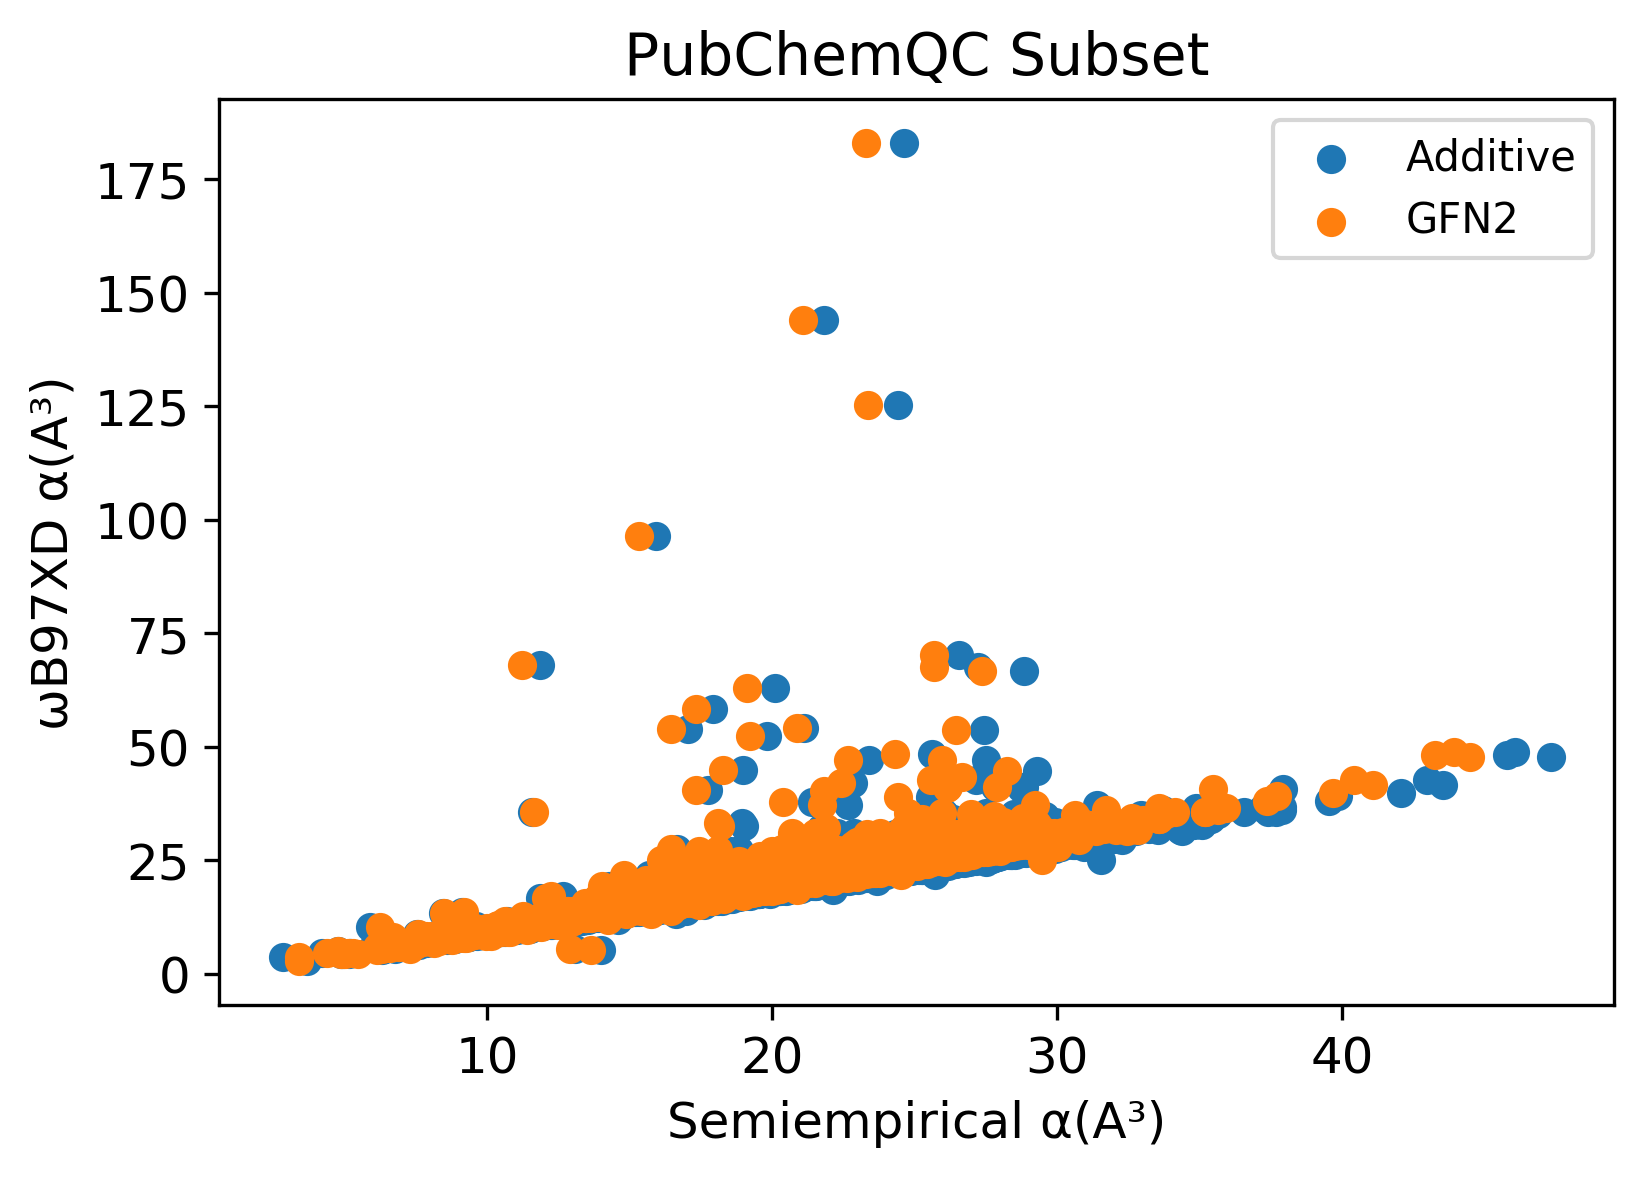

In [22]:
plt.scatter(x=pcqc['add_alpha(A^3)'], y=pcqc['dft_alpha(A^3)'])
plt.scatter(x=pcqc['gfn2_alpha(A^3)'], y=pcqc['dft_alpha(A^3)'])
plt.xlabel('Semiempirical α(A³)')
plt.ylabel('ωB97XD α(A³)')

plt.title('PubChemQC Subset', fontsize=14)
plt.legend(['Additive', 'GFN2'])

# plt.savefig('additive_pcqc.png', transparent=False, bbox_inches='tight')

plt.show()

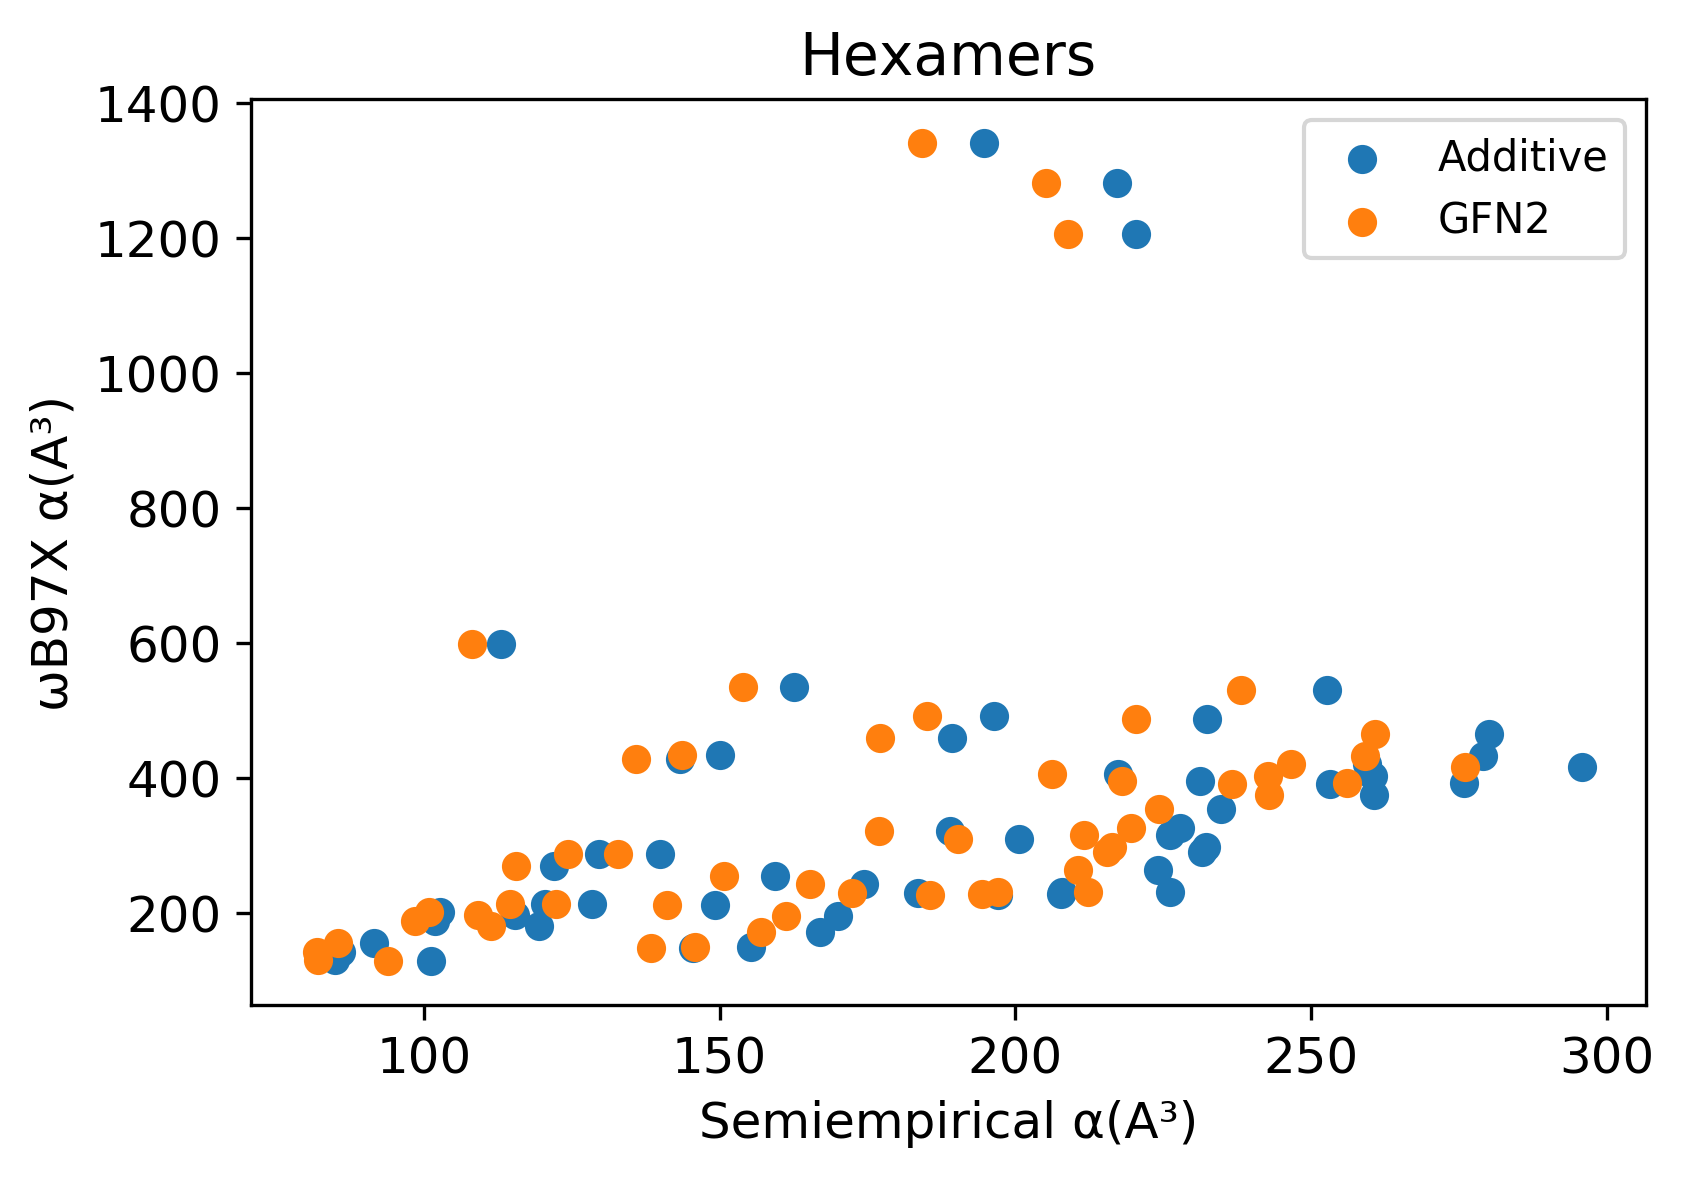

In [23]:
plt.scatter(x=hexamers['add_alpha(A^3)'], y=hexamers['dft_alpha(A^3)'])
plt.scatter(x=hexamers['gfn2_alpha(A^3)'], y=hexamers['dft_alpha(A^3)'])
plt.xlabel('Semiempirical α(A³)')
plt.ylabel('ωB97X α(A³)')

plt.title('Hexamers', fontsize=14)
plt.legend(['Additive', 'GFN2'])

# plt.savefig('additive_hexamers.png', transparent=False, bbox_inches='tight')

plt.show()

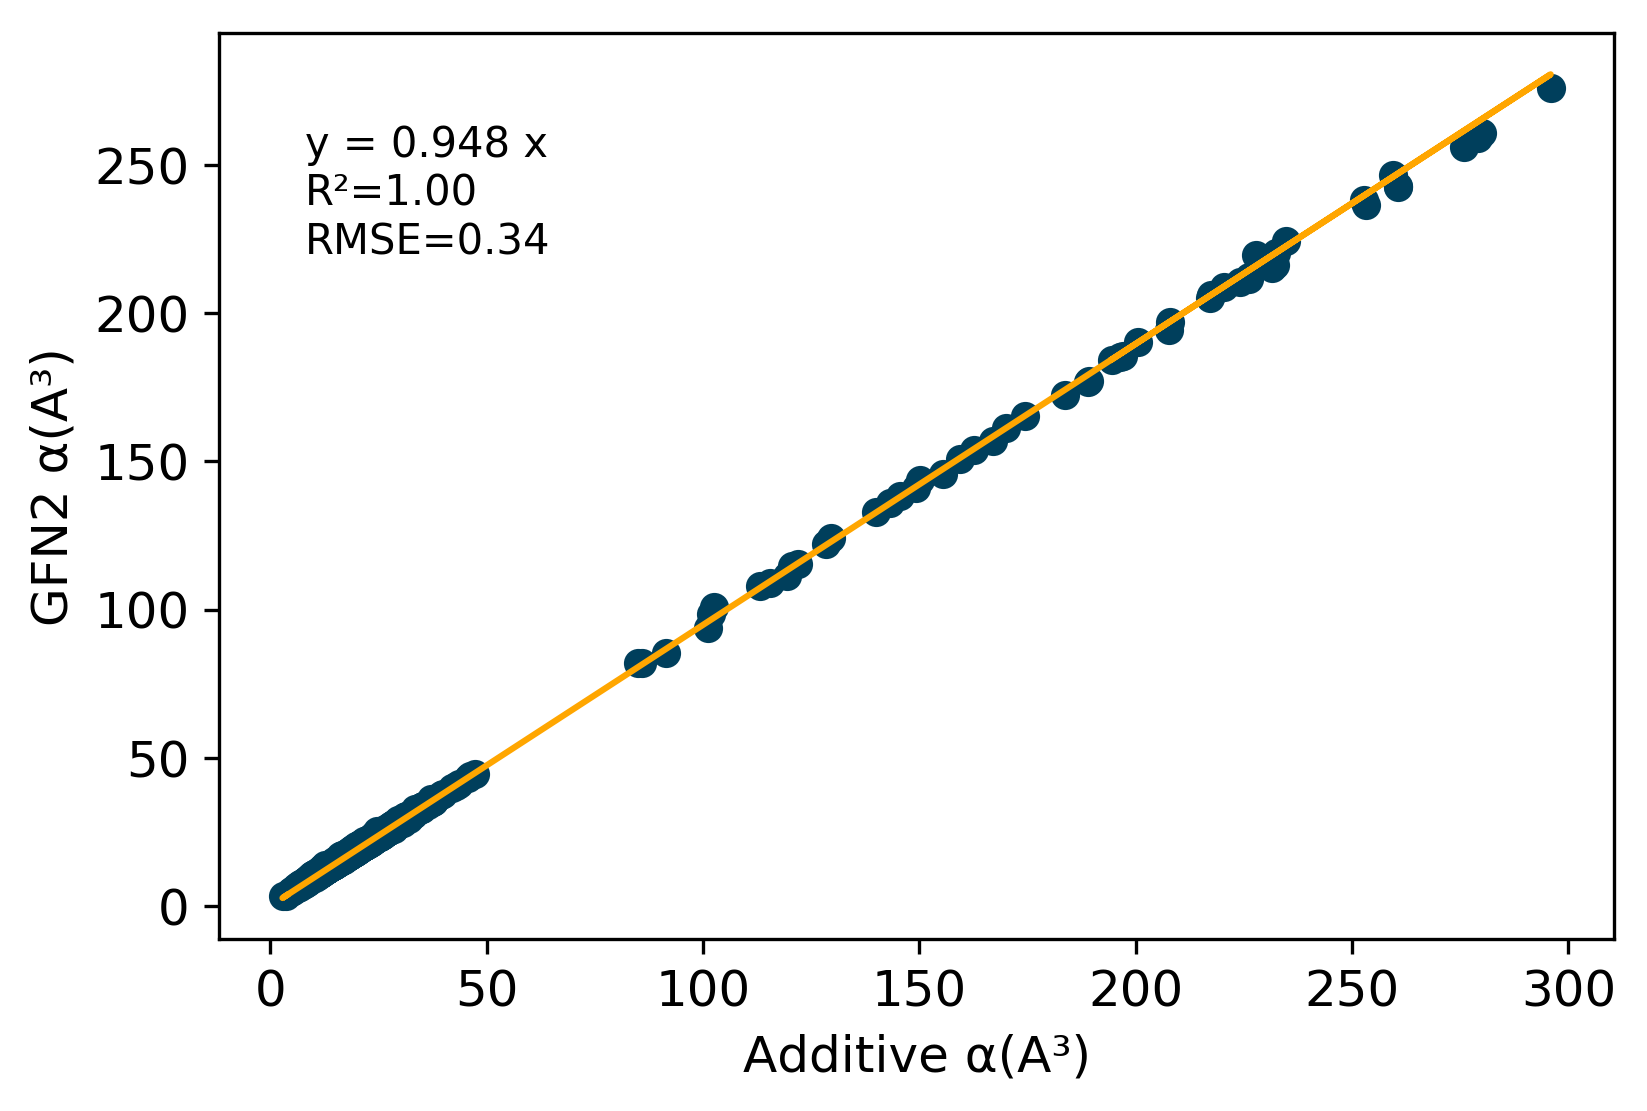

In [24]:
x = master['add_alpha(A^3)'].values
y = master['gfn2_alpha(A^3)'].values

# label axes
plt.xlabel('Additive α(A³)')
plt.ylabel('GFN2 α(A³)')

# perform linear regression
slope, intercept, r_squared, rmserror = perform_lin_regress(x, y, False)

# plot points & regression line
plt.scatter(x, y, c='#003f5c')
plt.plot(x, slope*x+intercept, c='#ffa600')

# print regression line equation & r-squared
# if intercept < 0:
#     y_int = '- %.3f' % abs(intercept)
# else: 
#     y_int = '+ %.3f' % intercept
# plt.text(8, 220, 'y = %.3f x %s\nR²=%.2f\nRMSE=%.2f' % (slope, y_int, r_squared, rmserror))

# print regression line w/OUT 0 y-int
plt.text(8, 220, 'y = %.3f x\nR²=%.2f\nRMSE=%.2f' % (slope, r_squared, rmserror))


# plt.savefig('additive_regression.png', transparent=False, bbox_inches='tight')

plt.show()